In [ ]:
#fast ai

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
#import torch
#from torch import nn, optim
import seaborn as sns
from pathlib import Path
import PIL
import json
from fastai import *
from fastai.tabular import * 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls "drive/My Drive/Colab Notebooks/Tabular/JanataHackSegmentation/inputs"

sample_submission.csv  testA.csv  Test.csv  trainA.csv	Train.csv


In [ ]:
# Read data
train = pd.read_csv('drive/My Drive/Colab Notebooks/Tabular/JanataHackSegmentation/inputs/trainA.csv')
test = pd.read_csv('drive/My Drive/Colab Notebooks/Tabular/JanataHackSegmentation/inputs/testA.csv')
sample_sub  = pd.read_csv('drive/My Drive/Colab Notebooks/Tabular/JanataHackSegmentation/inputs/sample_submission.csv') 

In [ ]:
#feature engineering and data prep

In [ ]:
#list(train.columns)

In [ ]:
target = pd.read_csv('drive/My Drive/Colab Notebooks/Tabular/JanataHackSegmentation/inputs/Train.csv')

In [ ]:
train = pd.concat([target['Segmentation'], train], axis=1)

In [ ]:
len(train.columns),len(test.columns)

(111, 110)

In [ ]:
#train = train.drop(drop_lst,axis =1 )
#test = test.drop(drop_lst,axis =1 )

In [ ]:
#train.columns

In [ ]:
train.head()

,Segmentation,Unnamed: 0,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,km,nGenderSpending,nEverMarried,Profession_Age_mean,Profession_Age_min,Profession_Age_max,Spending_Score_Age_mean,Spending_Score_Age_min,Spending_Score_Age_max,Age_mean,Age_min,Age_max,AgeBand,AgeBandCummCount,AgeBandCount,AgeBandUnique,AgeProfessionBandCummCount,AgeProfessionBandmean,AgeProfessionBandmin,AgeProfessionBandmax,AgeProfessionBandUnique,AgeSpending_ScoreBandmean,AgeSpending_ScoreBandmin,AgeSpending_ScoreBandmax,AgeSpending_ScoreBandUnique,Professionmeantarget,AgeBandmeantarget,Spending_Scoremeantarget,Spending_Score_enc,...,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,D,0,1,0,22,0,5,1.000000,2,4.0,3,0,0,409,26.732000,18,86,38.505390,18,89,30.669544,18,89,0,0,2185.0,1861,0,463627.126005,458985,467963,927,463491.050754,458985,467972,1681,0.0,0.0,0.0,1.363771,...,0.0,0.0,22.0,1.000000,4.0,0.0,0.0,409.0,26.732000,18.0,86.0,38.505390,18.0,89.0,30.669544,18.0,89.0,0.0,0.0,2185.0,1861.0,0.0,463627.126005,458985.0,467963.0,927.0,463491.050754,458985.0,467972.0,1681.0,0.0,0.0,0.0,1.363771,1.491300,1.302122,977.0,3384.0,801.0,483.0
1,A,1,0,1,38,1,2,2.641663,0,3.0,3,2,0,137,41.547594,18,81,46.973836,18,89,51.305352,18,89,2,0,2278.0,1720,0,463731.676596,458989,467920,200,463654.297840,458984,467969,574,0.0,0.0,0.0,1.461745,...,0.0,0.0,38.0,2.641663,3.0,2.0,0.0,137.0,41.547594,18.0,81.0,46.973836,18.0,89.0,51.305352,18.0,89.0,2.0,0.0,2278.0,1720.0,0.0,463731.676596,458989.0,467920.0,200.0,463654.297840,458984.0,467969.0,574.0,0.0,0.0,0.0,1.461745,1.750403,1.655212,1242.0,1490.0,873.0,530.0
2,B,2,0,1,67,1,2,1.000000,2,1.0,5,1,0,1838,41.547594,18,81,38.505390,18,89,51.305352,18,89,4,0,1976.0,1650,0,463626.408163,459329,467973,85,463423.945205,458996,467912,646,0.0,0.0,3.0,1.716858,...,1.0,0.0,67.0,1.000000,1.0,1.0,0.0,1838.0,41.547594,18.0,81.0,38.505390,18.0,89.0,51.305352,18.0,89.0,4.0,0.0,1976.0,1650.0,0.0,463626.408163,459329.0,467973.0,85.0,463423.945205,458996.0,467912.0,646.0,0.0,0.0,3.0,1.716858,1.219820,1.606836,1110.0,4277.0,4067.0,619.0
3,B,3,1,1,67,1,7,0.000000,1,2.0,5,1,0,1821,75.335308,20,89,58.189763,18,89,51.240149,18,89,4,1,2210.0,1650,0,463300.830189,458987,467952,614,463304.071698,458982,467952,630,0.0,1.0,0.0,1.424679,...,1.0,0.0,67.0,0.000000,2.0,1.0,0.0,1821.0,75.335308,20.0,89.0,58.189763,18.0,89.0,51.240149,18.0,89.0,4.0,1.0,2210.0,1650.0,0.0,463300.830189,458987.0,467952.0,614.0,463304.071698,458982.0,467952.0,630.0,0.0,1.0,0.0,1.424679,1.403361,1.606836,1666.0,624.0,4067.0,36.0
4,A,4,0,1,40,1,3,2.641663,1,6.0,5,2,0,508,42.943200,18,89,58.189763,18,89,51.305352,18,89,2,1,2046.0,1720,0,463510.572414,459098,467950,245,463717.243243,459019,467961,202,0.0,0.0,1.0,1.387189,...,1.0,0.0,40.0,2.641663,6.0,2.0,0.0,508.0,42.943200,18.0,89.0,58.189763,18.0,89.0,51.305352,18.0,89.0,2.0,1.0,2046.0,1720.0,0.0,463510.572414,459098.0,467950.0,245.0,463717.243243,459019.0,467961.0,202.0,0.0,0.0,1.0,1.387189,2.042781,1.630121,187.0,1046.0,4369.0,744.0


In [ ]:
procs = [FillMissing, Categorify, Normalize]

In [ ]:
cat_vars = ['Gender', 'Ever_Married', 'Age', 'Graduated','Profession','Spending_Score','Var_1','km']
cont_vars = ['Work_Experience',  'Family_Size',
       'nGenderSpending', 'nEverMarried', 'Profession_Age_mean',
       'Profession_Age_min', 'Profession_Age_max', 'Spending_Score_Age_mean',
       'Spending_Score_Age_min', 'Spending_Score_Age_max', 'Age_mean',
       'Age_min', 'Age_max', 'AgeBand', 'AgeBandCummCount', 'AgeBandCount',
       'AgeBandUnique', 'AgeProfessionBandCummCount', 'AgeProfessionBandmean',
       'AgeProfessionBandmin', 'AgeProfessionBandmax',
       'AgeProfessionBandUnique', 'AgeSpending_ScoreBandmean',
       'AgeSpending_ScoreBandmin', 'AgeSpending_ScoreBandmax',
       'AgeSpending_ScoreBandUnique', 'Professionmeantarget',
       'AgeBandmeantarget', 'Spending_Scoremeantarget', 'Spending_Score_enc',
       'Family_Size_enc', 'Var_1_enc', 'Family_Size_count',
       'Spending_Score_count', 'Var_1_count', 'Profession_count',
       '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64']

In [ ]:
train[cat_vars] = train[cat_vars].astype('category')
test[cat_vars] = test[cat_vars].astype('category')

In [ ]:
dep_var = 'Segmentation'

In [ ]:
path = "drive/My Drive/Colab Notebooks/Tabular/JanataHackSegmentation/inputs"

In [ ]:
data = (TabularList.from_df(train, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                .split_by_rand_pct(valid_pct=0.15)                
                .label_from_df(cols=dep_var)
                .add_test(TabularList.from_df(test, cat_names=cat_vars, cont_names=cont_vars),label=0)
                .databunch())

#TabularDataBunch.from_df(path, train, dep_var=dep_var, valid_idx=valid_idx, test_df=test)

In [ ]:
data.show_batch(rows= 6)

Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Var_1,km,Work_Experience,Family_Size,nGenderSpending,nEverMarried,Profession_Age_mean,Profession_Age_min,Profession_Age_max,Spending_Score_Age_mean,Spending_Score_Age_min,Spending_Score_Age_max,Age_mean,Age_min,Age_max,AgeBand,AgeBandCummCount,AgeBandCount,AgeBandUnique,AgeProfessionBandCummCount,AgeProfessionBandmean,AgeProfessionBandmin,AgeProfessionBandmax,AgeProfessionBandUnique,AgeSpending_ScoreBandmean,AgeSpending_ScoreBandmin,AgeSpending_ScoreBandmax,AgeSpending_ScoreBandUnique,Professionmeantarget,AgeBandmeantarget,Spending_Scoremeantarget,Spending_Score_enc,Family_Size_enc,Var_1_enc,Family_Size_count,Spending_Score_count,Var_1_count,Profession_count,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,target
1,1,45,1,0,2,2,2,-0.5072,0.7551,1.7898,-0.7172,0.2444,-0.3480,0.5513,-0.7073,0.0000,0.0000,0.8186,0.0000,0.0000,0.0189,0.8936,-0.0270,-0.7949,1.6647,-0.3746,-0.5323,0.2612,0.9724,-0.9930,-0.3775,0.6893,-0.0273,-0.5266,-0.9630,0.8427,1.4960,1.4999,0.8494,-0.0899,0.9854,-1.3416,1.3216,-0.9079,0.9079,-0.8253,0.8253,-0.7707,0.7860,-0.0963,1.4887,-0.3065,-0.3042,-0.3710,-0.2810,-0.4462,-0.1799,-0.2882,-0.1912,-0.1229,-0.5705,-0.4184,0.8072,-0.1312,-0.2364,2.9332,-0.3941,-0.1051,-1.3800,-0.1599,0.0866,-0.5072,0.7551,1.0839,1.7898,-0.7172,0.2444,-0.3480,0.5513,-0.7073,0.0000,0.0000,0.8186,0.0000,0.0000,0.0189,0.8936,-0.0270,-0.7949,1.6647,-0.3746,-0.5323,0.2612,0.9724,-0.9930,-0.3775,0.6893,-0.0273,-0.5266,-0.9630,0.8427,1.4960,1.4999,0.8494,-0.0899,0.9854,-1.3416,1.3216,B
1,1,84,0,7,2,5,1,-0.5072,-1.2294,-0.7846,1.2665,2.7267,2.8730,0.5513,-0.7073,0.0000,0.0000,0.8186,0.0000,0.0000,1.4384,-1.2623,-0.0270,-1.3218,-0.6036,-0.7800,-0.5074,0.1710,0.5190,-0.3828,0.1367,-1.4365,-0.6229,-0.3971,-0.4763,0.5801,1.1100,-1.3472,0.4478,-0.1820,1.1586,0.6230,-1.3059,-0.9079,0.9079,-0.8253,0.8253,1.2972,-1.2721,-0.0963,-0.6716,-0.3065,-0.3042,-0.3710,-0.2810,-0.4462,-0.1799,3.4693,-0.1912,-0.1229,-0.5705,-0.4184,0.8072,-0.1312,-0.2364,-0.3409,-0.3941,-0.1051,0.7245,-0.1599,2.4268,-0.5072,-1.2294,-0.0279,-0.7846,1.2665,2.7267,2.8730,0.5513,-0.7073,0.0000,0.0000,0.8186,0.0000,0.0000,1.4384,-1.2623,-0.0270,-1.3218,-0.6036,-0.7800,-0.5074,0.1710,0.5190,-0.3828,0.1367,-1.4365,-0.6229,-0.3971,-0.4763,0.5801,1.1100,-1.3472,0.4478,-0.1820,1.1586,0.6230,-1.3059,A
1,0,33,1,5,2,5,0,0.1156,-1.2294,1.4738,-0.8074,-1.4268,-0.3480,-0.7051,-0.7073,0.0000,0.0000,-1.3653,0.0000,0.0000,-0.6908,1.0527,-0.0270,1.5835,0.3931,-0.0413,-0.4491,0.2243,-0.0780,0.2264,-0.4510,0.5865,1.0900,2.0742,0.0262,0.8021,0.8306,-1.3926,-0.2481,-0.0993,0.6358,0.7306,0.0222,-0.9079,0.9079,1.2114,-1.2114,-0.7707,0.7860,-0.0963,-0.6716,-0.3065,-0.3042,-0.3710,-0.2810,2.2406,-0.1799,-0.2882,-0.1912,-0.1229,-0.5705,-0.4184,0.8072,-0.1312,-0.2364,-0.3409,-0.3941,-0.1051,0.7245,-0.1599,-0.6334,0.1156,-1.2294,-1.1396,1.4738,-0.8074,-1.4268,-0.3480,-0.7051,-0.7073,0.0000,0.0000,-1.3653,0.0000,0.0000,-0.6908,1.0527,-0.0270,1.5835,0.3931,-0.0413,-0.4491,0.2243,-0.0780,0.2264,-0.4510,0.5865,1.0900,2.0742,0.0262,0.8021,0.8306,-1.3926,-0.2481,-0.0993,0.6358,0.7306,0.0222,D
0,0,28,1,5,2,5,0,0.0040,1.4166,-0.2674,-0.4236,-1.4268,-0.3480,-0.7051,-0.7073,0.0000,0.0000,-1.0598,0.0000,0.0000,-1.4006,-0.6278,-0.0270,0.2663,0.3096,0.7370,-0.5240,0.2161,1.5183,0.1900,-0.6714,0.6208,1.4457,2.0582,1.8957,0.6769,-0.9873,0.2183,-1.4818,-1.5095,0.4710,0.8168,-0.6620,1.1013,-1.1013,1.2114,-1.2114,-0.7707,0.7860,-0.0963,-0.6716,-0.3065,-0.3042,-0.3710,-0.2810,2.2406,-0.1799,-0.2882,-0.1912,-0.1229,-0.5705,-0.4184,0.8072,-0.1312,-0.2364,-0.3409,-0.3941,-0.1051,0.7245,-0.1599,-0.9335,0.0040,1.4166,-1.1396,-0.2674,-0.4236,-1.4268,-0.3480,-0.7051,-0.7073,0.0000,0.0000,-1.0598,0.0000,0.0000,-1.4006,-0.6278,-0.0270,0.2663,0.3096,0.7370,-0.5240,0.2161,1.5183,0.1900,-0.6714,0.6208,1.4457,2.0582,1.8957,0.6769,-0.9873,0.218

In [ ]:
#[400,150]
learn = tabular_learner(data, layers=[600,350],metrics=accuracy,ps=[0.001,0.01], emb_drop=0.02,emb_szs={'Profession': 6,'AgeBand': 8,'Spending_Score': 6,'Var_1':4})

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


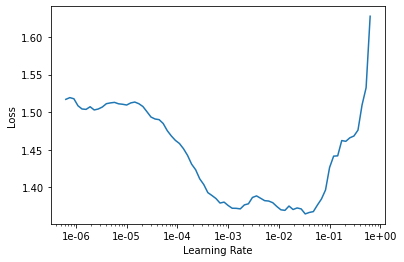

In [ ]:
learn.recorder.plot()

In [ ]:
#learn.fit(1, 1e-4)

In [ ]:
lr = 1e-4
learn.fit_one_cycle(15, lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.321994,1.217609,0.461157,00:01
1,1.157276,1.119393,0.514876,00:01
2,1.097913,1.104324,0.525620,00:01
3,1.061508,1.092316,0.523967,00:01
4,1.030953,1.091442,0.521488,00:01
5,1.010143,1.086808,0.531405,00:01
6,0.982764,1.095915,0.531405,00:01
7,0.967351,1.088420,0.533058,00:01
8,0.946653,1.079816,0.533884,00:01
9,0.930190,1.088899,0.523967,00:01


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.883394,1.106772,0.506612,00:01
1,0.906141,1.100573,0.523967,00:01
2,0.885678,1.100289,0.524793,00:01
3,0.865851,1.102710,0.520661,00:01


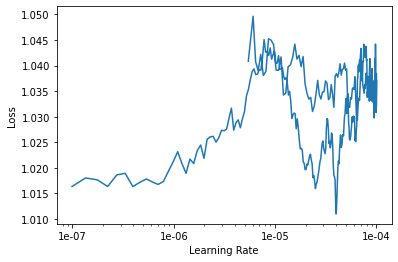

In [ ]:
learn.recorder.plot()

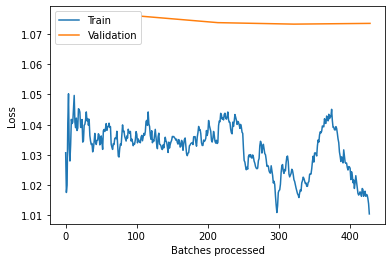

In [ ]:
learn.recorder.plot_losses()

In [ ]:
test_preds, targets = learn.get_preds(ds_type=DatasetType.Test)
predictions = np.argmax(test_preds, axis = 1) 
predictions

tensor([2, 2, 1,  ..., 0, 1, 3])

In [ ]:
results = pd.DataFrame(data=predictions, columns=["Segmentation"])
results['Segmentation'] = results['Segmentation'].map({0:'A',1:'B',2:'C',3:'D'})

In [ ]:
results.Segmentation.value_counts()

D    830
C    699
A    638
B    460
Name: Segmentation, dtype: int64

In [ ]:
#results['gender'] = results['gender'].map({1:'female',0:'male'})
sample_sub['Segmentation'] = results['Segmentation']
sample_sub.to_csv(path+'/sample_submission_Aug_FastAI.csv',index=False)

In [ ]:
sample_sub.Segmentation.value_counts()

D    819
C    716
A    606
B    486
Name: Segmentation, dtype: int64

In [ ]:
#finished
